**Problem Description**: On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.

*   One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
*   Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upperclass.

The problem associated with the Titanic dataset is to predict whether a passenger survived the disaster or not. The dataset contains various features such as passenger class, age, gender, cabin, fare, and whether the passenger had any siblings or spouses on board. These features can be used to build a predictive model to determine the likelihood of a passenger surviving the
disaster. The dataset offers opportunities for feature engineering, data visualization, and model selection, making it a valuable resource for developing and testing data analysis and machine learning skills.
Perform Below Tasks to complete the assignment:-

1. Download the dataset.

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving titanic.csv to titanic.csv




```
# This is formatted as code
```

2. Load the dataset.

In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['titanic.csv']))
print(df)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [ ]:
pip install sklearn.preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sklearn.preprocessing (from versions: none)
ERROR: No matching distribution found for sklearn.preprocessing


In [ ]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# Lets first load the train and test the dataset
df_train = pd.read_csv('titanic.csv')
df_train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df_train.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

5. Handling the missing values

In [ ]:
mean_age = df_train['age'].mean()
df_train['age'].fillna(value=mean_age, inplace=True)

df_train['age'] = df_train['age'].astype(int)

df = df_train.drop(['deck'], axis=1)

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


3. Perform Below Visualizations.
*   Univariate
*   BiVariate
*   Multivariate

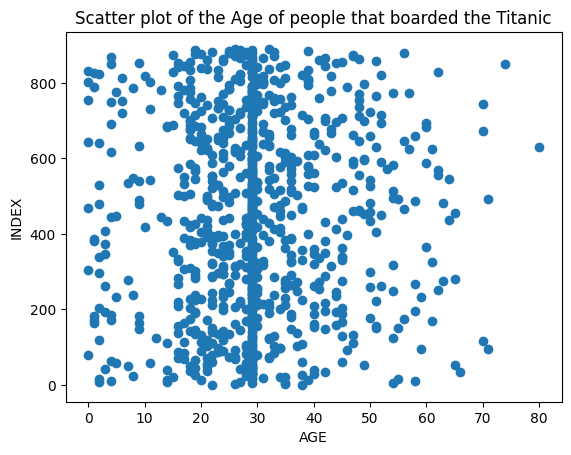

In [ ]:
# Creating a Scatter plot
plt.scatter(df['age'], df.index)
plt.title("Scatter plot of the Age of people that boarded the Titanic")
plt.xlabel("AGE")
plt.ylabel("INDEX")
plt.show()

**Bivariate**

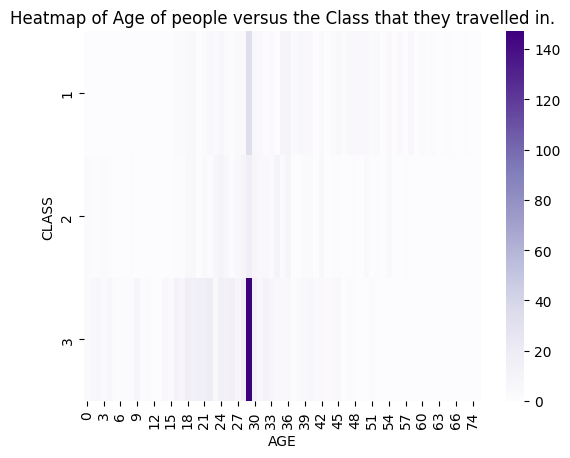

In [ ]:
# Creating a Heatmap
cross_tab = pd.crosstab(df['pclass'], df['age'])
sns.heatmap(cross_tab, annot = False, cmap='Purples')
plt.title('Heatmap of Age of people versus the Class that they travelled in.')
plt.xlabel("AGE")
plt.ylabel("CLASS")
plt.show()

**Multi Variate**

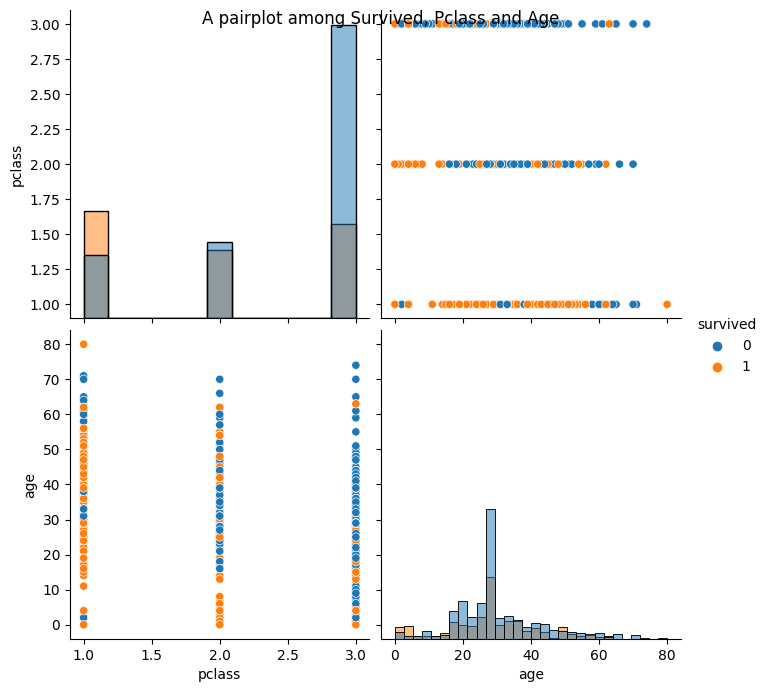

In [ ]:
# Creating a pairplot
var = ['survived', 'pclass', 'age']
pp = sns.pairplot(df[var], hue='survived', diag_kind='hist', height=3.5)
pp.fig.suptitle("A pairplot among Survived, Pclass and Age")
plt.show()

**4. Perform descriptive statistics on the dataset.**

In [ ]:
print("Mean of the age colum", df['age'].mean(), "\n")
print("Median of the fare column", df['fare'].median(), "\n")
print("Range of the age", df['age'].max() - df['age'].min(), "\n")
print("Range of the fare", df['fare'].max() - df['fare'].min(), "\n")
print("Variance of the fare", df['fare'].var(), "\n")
print("Standard Deviation of the fare", df['fare'].std(), "\n")
print("Variance of the age", df['age'].var(), "\n")
print("Standard Deviation of the age", df['age'].std())

Mean of the age colum 29.544332210998878 

Median of the fare column 14.4542 

Range of the age 80 

Range of the fare 512.3292 

Variance of the fare 2469.436845743116 

Standard Deviation of the fare 49.6934285971809 

Variance of the age 169.35842570524218 

Standard Deviation of the age 13.013778302447072
